In [44]:

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import plotly.express as px


In [45]:
sd = pd.read_csv('F:/PyCharm/Data Visualization/Steam Data/Valve_Player_Data.csv')
sd.head()

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive


In [46]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Month_Year    5271 non-null   object 
 1   Avg_players   5271 non-null   float64
 2   Gain          5173 non-null   float64
 3   Percent_Gain  5173 non-null   object 
 4   Peak_Players  5271 non-null   int64  
 5   URL           5271 non-null   object 
 6   Date          5271 non-null   object 
 7   Game_Name     5271 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 329.6+ KB


In [47]:
sd.describe()

,Avg_players,Gain,Peak_Players
count,5.271000e+03,5173.000000,5.271000e+03
mean,3.763149e+04,92.071786,7.032072e+04
std,1.032951e+05,15161.864515,1.941948e+05
min,0.000000e+00,-250248.990000,0.000000e+00
25%,6.720205e+03,-1374.480000,1.302900e+04
50%,1.235840e+04,-0.080000,2.344700e+04
75%,2.414976e+04,1255.140000,4.610150e+04
max,1.584887e+06,426446.120000,3.236027e+06


In [48]:
sd.columns

Index(['Month_Year', 'Avg_players', 'Gain', 'Percent_Gain', 'Peak_Players',
       'URL', 'Date', 'Game_Name'],
      dtype='object')

In [49]:
sd.isna().sum()

Month_Year       0
Avg_players      0
Gain            98
Percent_Gain    98
Peak_Players     0
URL              0
Date             0
Game_Name        0
dtype: int64

In [50]:
data_clean = sd

data_clean.replace('<nan>', np.nan, inplace=True)


In [51]:
fig = pd.read_csv("Valve_Player_Data.csv", index_col=0, parse_dates=True)
fig.head()

,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
Month_Year,,,,,,,
2021-09-01,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
2021-08-01,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2021-07-01,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
2021-06-01,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
2021-05-01,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive


<AxesSubplot:xlabel='Month_Year'>

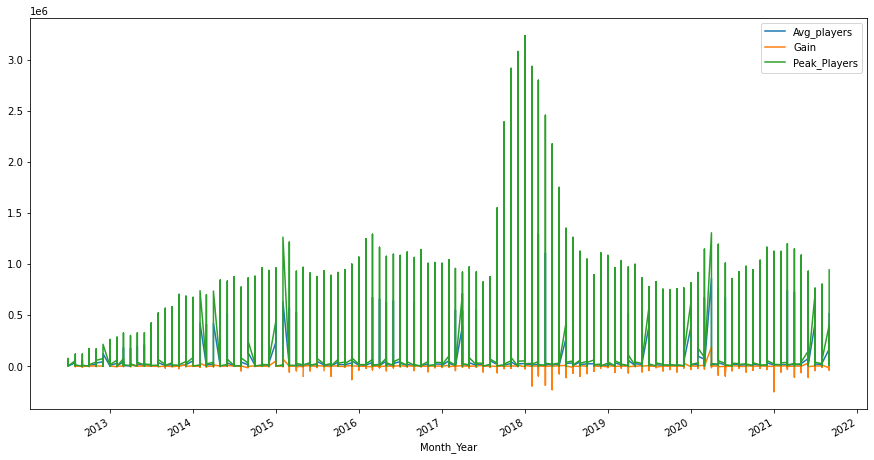

In [52]:
fig.plot(figsize=(15, 8))


In [53]:
sd1 = data_clean.groupby('Game_Name', as_index=False, sort=True)[
    'Avg_players'].mean()
sd1 = sd1.sort_values('Avg_players', ascending=False)
sd1.head(10)


,Game_Name,Avg_players
24,Dota 2,451064.796937
56,PUBG: Battlegrounds,443975.256545
14,Counter Strike: Global Offensive,327054.718829
3,Apex Legends,120382.517273
88,Valheim,72749.180000
21,Destiny 2,70873.839167
41,Grand Theft Auto V,66853.732821
49,NARAKA: BLADEPOINT,59720.200000
76,Team Fortress 2,55087.743243
83,Tom Clancy's Rainbow Six Seige,53576.636000


In [54]:
# Creating new CSV for columns Game_Name and Avg_players
sd2 = print(sd1.head(10).to_csv("sd1.csv"))


None


In [55]:
sd2 = pd.read_csv('sd1.csv')
sd2



,Unnamed: 0,Game_Name,Avg_players
0,24,Dota 2,451064.796937
1,56,PUBG: Battlegrounds,443975.256545
2,14,Counter Strike: Global Offensive,327054.718829
3,3,Apex Legends,120382.517273
4,88,Valheim,72749.180000
5,21,Destiny 2,70873.839167
6,41,Grand Theft Auto V,66853.732821
7,49,NARAKA: BLADEPOINT,59720.200000
8,76,Team Fortress 2,55087.743243
9,83,Tom Clancy's Rainbow Six Seige,53576.636000


In [62]:
df1 = data_clean.pivot_table(columns=['Month_Year', 'Game_Name'], values=['Avg_players'])
df1.head(10)

# fig = px.line(df1, x="Month_Year", y="Avg_players", color='Game_Name', title='Avg Players Over the Years')
# fig.show()

Month_Year  April 2013                                                        \
Game_Name       Arma 3 Counter Strike: Global Offensive Counter-Strike  Dayz   
Avg_players    2035.86                          16006.0       21204.46  0.35   

Month_Year                                                           \
Game_Name       Dota 2 Euro Truck Simulator 2 Europa Universalis IV   
Avg_players  174835.73                 783.62                   0.0   

Month_Year                                      ... September 2021  \
Game_Name   Garry's Mod Left 4 Dead 2 PAYDAY 2  ...        Valheim   
Avg_players    13753.29       7321.01      4.0  ...       32988.16   

Month_Year                                                               \
Game_Name   Wallpaper Engine War Thunder  Warframe World of Tanks Blitz   
Avg_players         42727.96    25179.81  46968.35              17285.8   

Month_Year                                          \
Game_Name   World of Warships Yu-Gi-Oh! Duel Links   
Avg_players           7289.85              8630.43   

Month_Year                                                                 
Game_Name   eFootball PES 2021 SEASON UPDATE tModLoader 雀魂麻将(MahjongSoul)  
Avg_players                          9465.76   11068.81           6926.76  

[1 rows x 5271 columns]

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Game_Name', y='Avg_players', data=sd2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



In [ ]:
sd3 = data_clean.groupby('Game_Name', as_index=False, sort=True)[
    'Peak_Players'].mean()
sd3 = sd3.sort_values('Peak_Players', ascending=False)
sd3.head(10)


In [ ]:
print(sd3.head(10).to_csv("sd3.csv"))

In [ ]:
sd4 = pd.read_csv('sd3.csv')
sd4


In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Game_Name', y='Peak_Players', data=sd4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [ ]:
data_clean.groupby('Game_Name', as_index=False, sort=False)[
    'Peak_Players'].sum()
sd5 = data_clean.sort_values('Peak_Players', ascending=False)
sd5.head(10)

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Game_Name', y='Peak_Players', data=sd5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
